## 5.決定木・ランダムフォレスト

### 決定木分析

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

データを読み込みます。

In [ ]:
#データの読み込み
cancer = pd.read_csv("decision.csv",index_col=0)
cancer

,regular_customer,number_of_visits,point_card,total_purchase_amount
0,0,18,0,10380
1,0,21,0,17770
2,0,20,0,21250
3,0,11,0,20380
4,0,20,0,14340
...,...,...,...,...
564,0,22,0,22390
565,0,20,0,28250
566,0,17,0,28080
567,0,21,0,29330


In [ ]:
#pd.DataFrame(cancer.data, columns = cancer.feature_names)　
#変数の選定
Y = cancer['regular_customer'].values
X = cancer.drop(['regular_customer'], axis=1).values

実際に決定木分析を行っていきます。

In [ ]:
from sklearn.model_selection import train_test_split

#学習用データとテスト用データに分割
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,  test_size = 0.3, random_state =0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#決定木分析
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

学習用データとテスト用データの精度を確認します。

In [ ]:
print("学習用データの精度：{:.3f}".format(tree.score(X_train, Y_train)))
print("テスト用データの精度：{:.3f}".format(tree.score(X_test, Y_test)))

学習用データの精度：0.952
テスト用データの精度：0.906


### 決定木の可視化

先程の決定木分析の結果を可視化します。

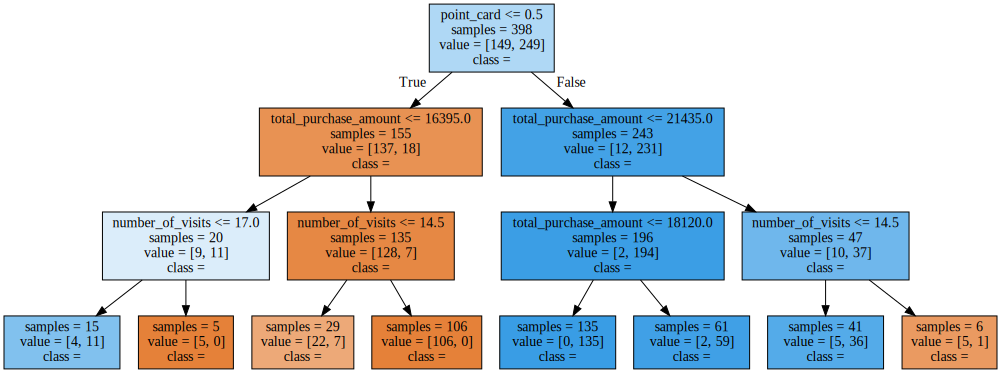

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree_data=export_graphviz(tree, out_file =None, class_names =["なる", "ならない"],
                 feature_names =cancer.columns[1:], impurity =False, filled =True)

graphviz.Source(tree_data)

### ランダムフォレスト

ランダムフォレストは、多種多様な決定木を作成し、多数決式で最終的な判断を行います。  
過学習を防止したり、変数の重要性を確認できるアルゴリズムです。

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#ランダムフォレスト
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)

ランダムフォレストの学習器で予測を行います。

In [ ]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)

#正解率
accuracy_score(pred, Y_test)

0.9122807017543859

混合行列でも精度を確認してみます。

In [ ]:
from sklearn.metrics import confusion_matrix

#混合行列で精度を確認する
mat = confusion_matrix(Y_test,pred)

class_names = ["なる", "ならない"]
df = pd.DataFrame(mat,index=class_names,columns=class_names)
df

,なる,ならない
なる,56,7
ならない,8,100


ランダムフォレストでは、変数の重要度を確認することもできます。  
変数の重要度をプロットしてみます。

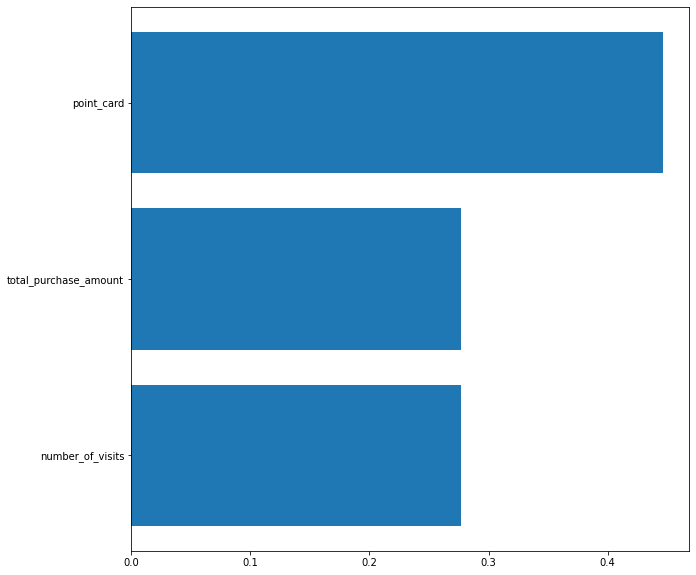

In [ ]:
features = cancer.columns[1:]

#変数の重要度を読み込む
importances = clf.feature_importances_

#重要度を降順にする
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.show()